# Investigate Wind Direction

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
ds = xr.open_dataset("../output/grids/a3d_grids.nc")

# Plot wind speed and direction

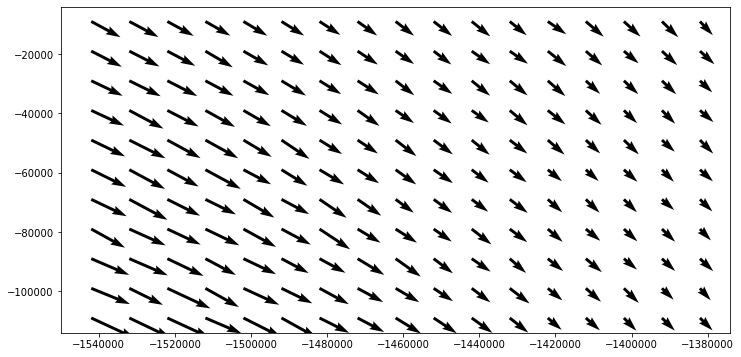

In [5]:
'''
Calculates U and V components of wind from wind speed and direction. 
Wind direction is the meteorological wind direction (i.e. direction the wind is coming from in degrees)
'''
def calc_U_V(speed, direction):
    U = -speed * np.sin(math.pi / 180 * direction)
    V = -speed * np.cos(math.pi / 180 * direction)
    return U, V

# Get U and V components
U, V = calc_U_V(ds['ws'], ds['dw'])

# Get lat/lon
x_snowpack = ds['easting']
y_snowpack = ds['northing']

# Plot map of mean wind
plt.figure(figsize=(12,6))
space = 10
plt.quiver(x_snowpack[::space], y_snowpack[::space], U.mean(dim='time')[::space,::space], V.mean(dim='time')[::space,::space])

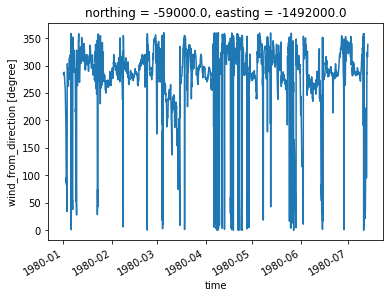

In [7]:
ds['dw'][:,50,50].plot()